In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("real_estate_clean.csv")


In [2]:
df.shape
df.head()
df.describe()


,house_size,latitude,longitude,price,numBathrooms,numBalconies,priceSqFt,price_per_sqft,property_id
count,11374.000000,11374.000000,11374.000000,11374.000000,11320.000000,11374.000000,0.0,11374.000000,11374.000000
mean,1063.351328,21.205824,74.248087,38310.231317,2.013339,0.459909,NaN,36.380498,5687.500000
std,591.255831,4.151436,2.069486,34384.965895,0.770571,0.852284,NaN,26.201811,3283.535315
min,150.000000,17.468220,18.497896,1500.000000,1.000000,0.000000,NaN,4.000000,1.000000
25%,661.000000,18.592538,72.927399,16000.000000,2.000000,0.000000,NaN,19.047619,2844.250000
50%,954.000000,19.117176,73.789055,26000.000000,2.000000,0.000000,NaN,26.666667,5687.500000
75%,1250.000000,19.406881,74.003708,47000.000000,2.000000,1.000000,NaN,46.153846,8530.750000
max,9500.000000,31.106586,91.792137,195000.000000,7.000000,8.000000,NaN,207.650273,11374.000000


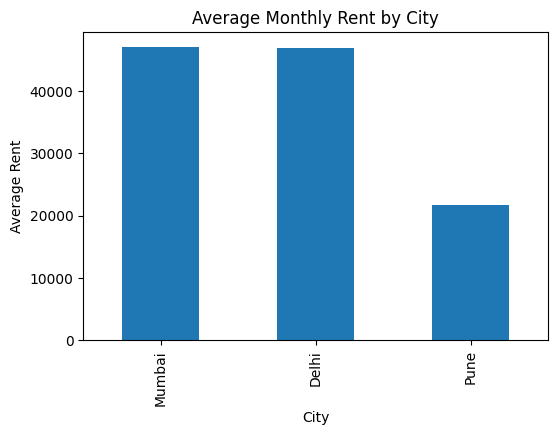

In [3]:
# averge rent by city
city_avg = df.groupby("city")["price"].mean().sort_values(ascending=False)

plt.figure(figsize=(6,4))
city_avg.plot(kind="bar")
plt.title("Average Monthly Rent by City")
plt.ylabel("Average Rent")
plt.xlabel("City")
plt.show()


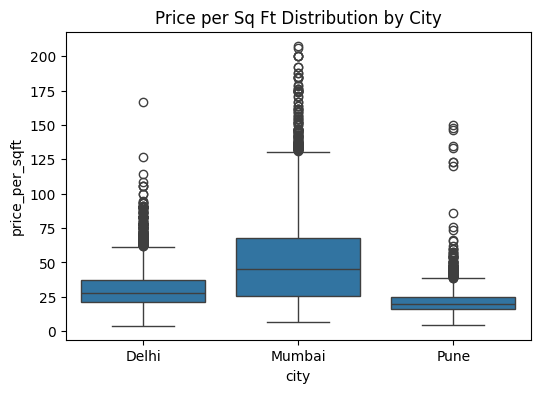

In [4]:
# price per sq ft by city
plt.figure(figsize=(6,4))
sns.boxplot(x="city", y="price_per_sqft", data=df)
plt.title("Price per Sq Ft Distribution by City")
plt.show()


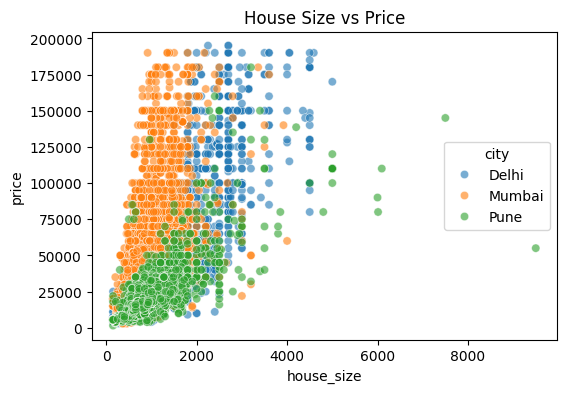

In [5]:
# price vs size (scatter plot)

plt.figure(figsize=(6,4))
sns.scatterplot(x="house_size", y="price", hue="city", data=df, alpha=0.6)
plt.title("House Size vs Price")
plt.show()


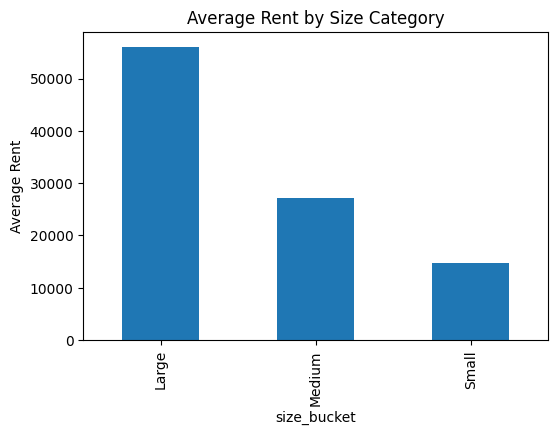

In [6]:
# AVerage rent by size bucket 
size_perf = df.groupby("size_bucket")["price"].mean()

plt.figure(figsize=(6,4))
size_perf.plot(kind="bar")
plt.title("Average Rent by Size Category")
plt.ylabel("Average Rent")
plt.show()


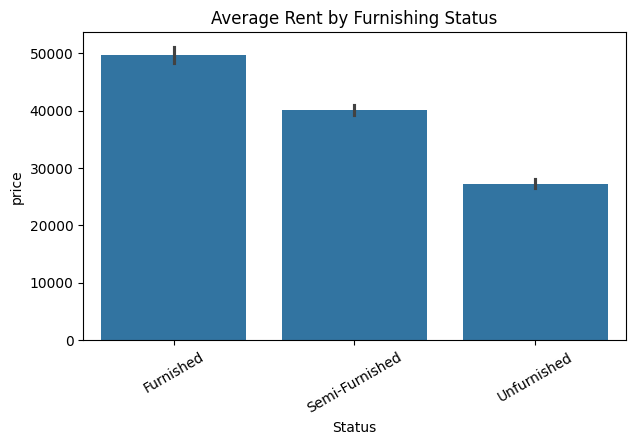

In [7]:
# furnishing status vs rent 
plt.figure(figsize=(7,4))
sns.barplot(x="Status", y="price", data=df)
plt.xticks(rotation=30)
plt.title("Average Rent by Furnishing Status")
plt.show()


In [8]:
# Locations by price per sq ft
top_locations = (
    df.groupby(["city", "location"])["price_per_sqft"]
    .mean()
    .sort_values(ascending=False)
    .head(10)
)

top_locations


city    location      
Mumbai  juhu tara         163.636364
Pune    Landewadi         150.000000
Mumbai  Carter Road       150.000000
        Breach Candy      141.176471
        Cuffe Parade      136.882841
        Malabar Hill      134.324275
        Kapurbawadi       133.333333
        Juhu Scheme       133.143615
        Napeansea Road    132.990280
        Khar West         131.100595
Name: price_per_sqft, dtype: float64

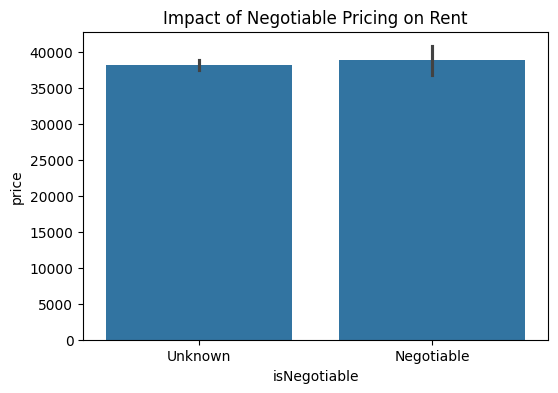

In [9]:
# Negotiable vs Non negotiable 

plt.figure(figsize=(6,4))
sns.barplot(x="isNegotiable", y="price", data=df)
plt.title("Impact of Negotiable Pricing on Rent")
plt.show()
